<a href="https://colab.research.google.com/github/Basma2423/Scikit-Learn-Tutorial/blob/main/Learning_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1: Import Libraries and Modules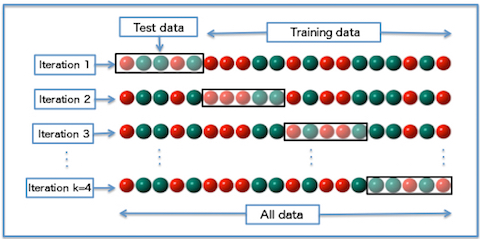

In [14]:
# For efficient numerical computation
import numpy as np
# To get rid of the scientific notation
np.set_printoptions(suppress=True)

# For supporting dataframes
import pandas as pd

from sklearn.model_selection import train_test_split

# For scaling, transforming and wrangling data
from sklearn import preprocessing

# The families of models we'll need
from sklearn.ensemble import RandomForestRegressor

# To perform the CROSS VALIDATION
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# For evaluating our model
from sklearn.metrics import mean_squared_error, r2_score

# A way to persist our model for future use
import joblib

##Step 2: Load Red Wine Data

In [15]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

In [16]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
print(str(data.shape[0]) + ' Samples and ' + str(data.shape[1]) + ' Features')

1599 Samples and 12 Features


In [18]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##Step 3: Split Data into Training and Test Sets

In [19]:
y = data.quality
X = data.drop('quality', axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

##Step 4: Declare Data Preprocessing Steps

In [23]:
#X_train_scaled = preprocessing.scale(X_train)
#print(X_train_scaled)

In [24]:
#print(X_train_scaled.mean(axis=0))
#print(X_train_scaled.std(axis=0))

Use Transformer API that allows us to "fit" a preprocessing step using the training data the same way you'd fit a model and then use the same transformation on futrue data sets!

####The Process:
1. Fit the transformer on the training set (save the means and stds)
2. Apply the transformer to the training set (scale the training data)
3. Apply the transformer to the test set (same means and stds)

In [37]:
# The scaler object now have the means and stds saved
#scaler = preprocessing.StandardScaler().fit(X_train)

In [36]:
#X_train_scaled = scaler.transform(X_train)

#print(X_train_scaled.mean(axis=0))
#print(X_train_scaled.std(axis=0))

In [35]:
# Use the saved means and stds
#X_test_scaled = scaler.transform(X_test)

#print(X_test_scaled.mean(axis=0))
#print(X_test_scaled.std(axis=0))

###In Practice

In [31]:
pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestRegressor(n_estimators=100,
                                               random_state=123))
# The random_state to get consistent results each time we run the code

##Step 5: Declare Hyperparameters to Tune

Where to create branches based on either mean-squared-error (MSE) or mean-absolute-error (MAE) ==> **MODEL Parameters**

Use which of the two criteria, MSE or MAE ==> **Hyperparameters**
How many trees to include in the forest ==> **Hyperparameters**

In [33]:
# List the tunable hyperparameters
print(pipeline.get_params())
# ...
# 'randomforestregressor__criterion': 'squared_error',
# 'randomforestregressor__max_depth': None,
# 'randomforestregressor__max_features': 'auto',
# 'randomforestregressor__max_leaf_nodes': None,
# ...

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(random_state=123))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestregressor': RandomForestRegressor(random_state=123), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestregressor__bootstrap': True, 'randomforestregressor__ccp_alpha': 0.0, 'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 1.0, 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_samples': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_weight_fraction_leaf': 0.0, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__n_jobs': None, 'randomforestregressor__oob_score': False, 'rando

In [34]:
hyperparameters = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth' : [None, 5, 3, 1]}

##Step 6: Tune Model Using a **Cross-Validation** Pipeline

![image.png](https://elitedatascience.com/wp-content/uploads/2016/12/K-fold_cross_validation_EN.jpg)

Use **CV** to evaluate different hyperparameters and estimate their effectiveness *ONLY USING YOUR TRAINING SET*

**BEST PRACTICE: Include the data processing steps INSIDE the cross-validation loop**

####CV Pipeline including the Preprocessing steps
1. Split your data into k equal parts, or “folds” (typically k=10).
2. **Preprocess k-1 training folds.**
3. Train your model on the same k-1 folds.
4. **Preprocess the hold-out fold using the same transformations from step (2).**
5. Evaluate your model on the same hold-out fold.
6. Perform steps (2) – (5) k times, each time holding out a different fold.
7. Aggregate the performance across all k folds. This is your performance metric.

In [38]:
# Translate to code in SCIKIT-LEARN
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

# Fit and tune model
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [39]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


##Step 7: Refit on the Entire Training Set

In [41]:
print(clf.refit)

True


##Step 8: Evaluate Model Pipeline on Test Data

In [42]:
y_pred = clf.predict(X_test)

In [45]:
# Evalutate
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.4712595193413647
0.34118218749999996


##Step 9: Save Model for Future Use

In [44]:
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [ ]:
# To load the model again
#clf = joblib.load('rf_regressor.pkl')

# Predict data set using loaded model
#clf2.predict(X_test)